In [1]:
%matplotlib inline

In [2]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
files = "x1.png", "x2.png"
noisy_array = np.array([image.img_to_array(image.load_img(name, target_size=(224,224))) for name in files])

FileNotFoundError: [Errno 2] No such file or directory: 'x1.png'

In [4]:
files = "mask1.png", "mask2.png"
clean_array = np.array([image.img_to_array(image.load_img(name, target_size=(224,224))) for name in files])

In [66]:
files = "x1.png", "x2.png"
noisy_array = np.array([image.img_to_array(image.load_img(name)) for name in files])

In [67]:
files = "mask1.png", "mask2.png"
clean_array = np.array([image.img_to_array(image.load_img(name)) for name in files])

In [68]:
noisy_array = noisy_array.astype('float32')/255
clean_array = clean_array.astype('float32')/255

In [69]:
noisy_array.shape

(2, 523, 534, 3)

In [70]:
clean_array.shape

(2, 850, 865, 3)

In [71]:
noisy_array[0].shape

(523, 534, 3)

In [72]:
first_noise = noisy_array[0]
print(first_noise.shape)
first_noise = np.reshape(first_noise, (1,224,224,3))
print(first_noise.shape)

(523, 534, 3)


ValueError: cannot reshape array of size 837846 into shape (1,224,224,3)

In [10]:
second_noise = noisy_array[1]
print(second_noise.shape)
second_noise = np.reshape(second_noise, (1,224,224,3))
print(second_noise.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [11]:
first_clean = clean_array[0]
print(first_clean.shape)
first_clean = np.reshape(first_clean, (1,224,224,3))
print(first_clean.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [12]:
second_clean = clean_array[0]
print(second_clean.shape)
second_clean = np.reshape(second_clean, (1,224,224,3))
print(second_clean.shape)

(224, 224, 3)
(1, 224, 224, 3)


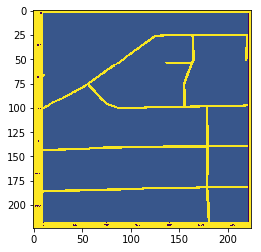

In [13]:
plt.imshow(second_clean[0][:,:,0])
#display.display_png(toimage(second_clean[0]).show())

In [14]:
from PIL import Image
from IPython import display
from scipy.misc import toimage
display.display_png(toimage(noisy_array[1]).show())

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


In [15]:
display.display_png(toimage(clean_array[1]).show())

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


In [64]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

def train_model():
    im_sz=1300
    n_channels=3
    input_img = Input(shape=(im_sz, im_sz, n_channels))  # adapt this if using `channels_first` image data format
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
    #print(autoencoder.summary())
    autoencoder.fit(first_noise, first_clean,
                    epochs=20,
                    batch_size=1,
                    shuffle=True,
                    validation_data=(second_noise, second_clean))

    autoencoder.save('autoencoder.h5')

In [65]:
train_model()

ValueError: Error when checking input: expected input_4 to have shape (1300, 1300, 3) but got array with shape (224, 224, 3)

In [29]:
from keras.models import load_model
model = load_model("autoencoder.h5")

In [61]:
output = model.predict(second_noise)

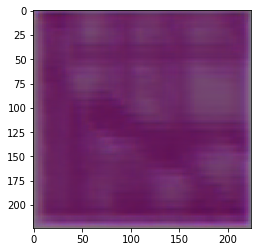

In [62]:
plt.imshow(output[0])

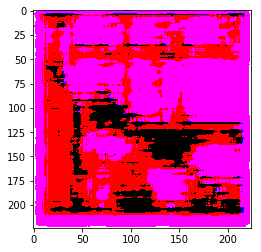

In [63]:
output = output[0]
output[output>0.4]=1
output[output<=0.4]=0
plt.imshow(output)

In [53]:
display.display_png(toimage(output[0]).show())

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


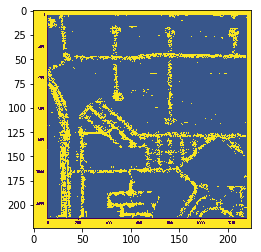

In [50]:
plt.imshow(second_noise[0][:,:,0])
#display.display_png(toimage(second_noise[0]).show())

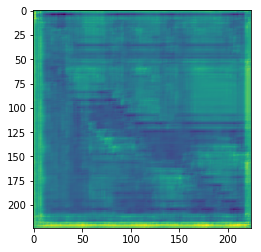

In [45]:
plt.imshow(output[0][:,:,0])
#display.display_png(toimage(output[0]).show())

In [13]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard
input_img = Input(shape=(224,224,3))

x = Conv2D(32,(3,3),activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

x = Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3,(3,3),activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [26]:
autoencoder.fit(noisy_array, clean_array, epochs=500, batch_size=1, shuffle=True, verbose=0)

In [27]:
test_image = np.reshape(noisy_array[0],(1,224,224,3))

In [28]:
display.display_png(toimage(test_image[0]).show())

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


In [29]:
test_image.shape

(1, 224, 224, 3)

In [30]:
result = autoencoder.predict(test_image)

In [31]:
result.shape

(1, 224, 224, 3)

In [32]:
result[0].shape

(224, 224, 3)

In [33]:
display.display_png(toimage(result[0]).show())

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


In [17]:
#result = result.reshape(224,224,3)

In [20]:
display.display_png(toimage(result[0][:,:,0]).show())

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  if __name__ == '__main__':


In [48]:
result[0][result[0] >0.1]=1
result[0][result[0]<=0.1]=0
display.display_png(toimage(result[0]).show())

/home/sumit/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  app.launch_new_instance()


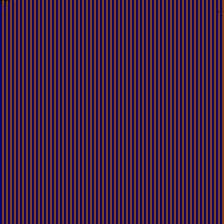

In [51]:
Image.fromarray(result[0], 'RGB')